## Visualising Digits with t‑SNE

t‑Distributed Stochastic Neighbour Embedding (t‑SNE) is a non‑linear dimensionality reduction technique that excels at visualising complex high‑dimensional data.  Here we project the 64‑dimensional digit images down to two dimensions and colour each point by its true label.  Even without supervision, t‑SNE reveals structure in the data.


/opt/pyvenv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/pyvenv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


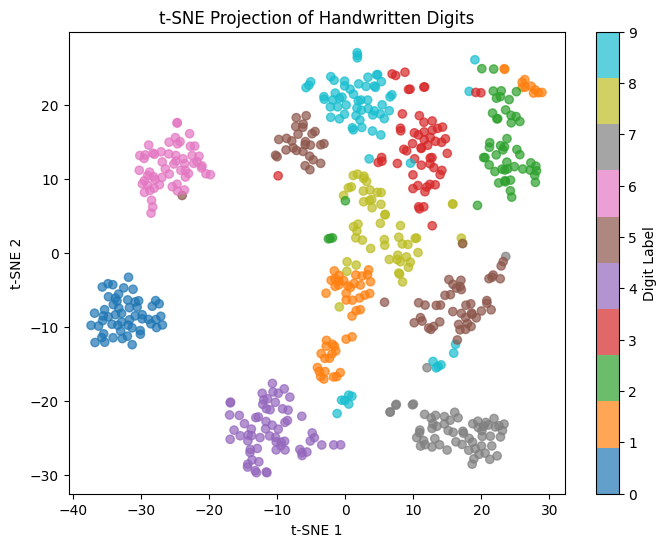

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Load digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Use a subset for computational efficiency
idx = np.random.RandomState(42).choice(len(X), size=600, replace=False)
X_subset = X[idx]
y_subset = y[idx]

# Standardise features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the t-SNE embedding
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Digit Label')
plt.title('t‑SNE Projection of Handwritten Digits')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


### Interpretation

The t‑SNE visualisation shows clusters corresponding to each digit, with certain digits (e.g., 1 and 7) appearing closer due to similar shapes.  This technique assists data scientists in understanding inherent groupings and relationships within complex datasets.  Businesses can use t‑SNE to explore customer purchase patterns, identify anomalies or visualise learned embeddings from deep models.
